In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [100]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

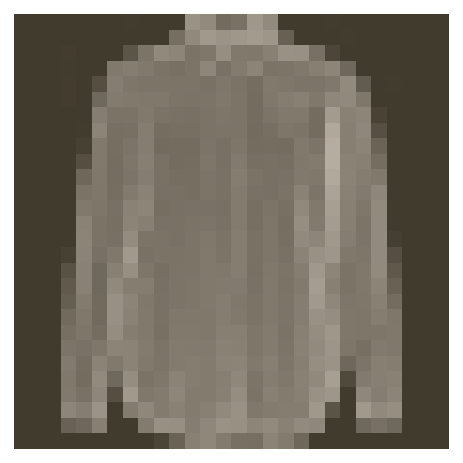

In [101]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [1]:
model =  fc_model.Network(784,10,[512,256,128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr= 0.003)

NameError: name 'fc_model' is not defined

In [105]:
fc_model.train(model, trainloader, testloader, criterion,optimizer,epochs =2)

Epoch: 1/2..  Training Loss: 1.525..  Test Loss: 0.856..  Test Accuracy: 0.660
Epoch: 1/2..  Training Loss: 0.958..  Test Loss: 0.762..  Test Accuracy: 0.714
Epoch: 1/2..  Training Loss: 0.903..  Test Loss: 0.671..  Test Accuracy: 0.751
Epoch: 1/2..  Training Loss: 0.868..  Test Loss: 0.661..  Test Accuracy: 0.732
Epoch: 1/2..  Training Loss: 0.812..  Test Loss: 0.636..  Test Accuracy: 0.758
Epoch: 1/2..  Training Loss: 0.730..  Test Loss: 0.637..  Test Accuracy: 0.759
Epoch: 1/2..  Training Loss: 0.778..  Test Loss: 0.628..  Test Accuracy: 0.764
Epoch: 1/2..  Training Loss: 0.775..  Test Loss: 0.587..  Test Accuracy: 0.797
Epoch: 1/2..  Training Loss: 0.795..  Test Loss: 0.588..  Test Accuracy: 0.789
Epoch: 1/2..  Training Loss: 0.745..  Test Loss: 0.587..  Test Accuracy: 0.782
Epoch: 1/2..  Training Loss: 0.790..  Test Loss: 0.658..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 0.781..  Test Loss: 0.583..  Test Accuracy: 0.778
Epoch: 1/2..  Training Loss: 0.776..  Test Loss: 0.6

In [107]:
print("Model is : ", model, '/n')
print('The state_dict keys :', model.state_dict().keys())

Model is :  Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) /n
The state_dict keys : odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [108]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [112]:
state_dict = torch.load('checkpoint.pth')
print(state_dict)

OrderedDict([('hidden_layers.0.weight', tensor([[ 0.0486,  0.0366,  0.0150,  ...,  0.0761,  0.0569,  0.0635],
        [ 0.0502,  0.0583,  0.0938,  ...,  0.0431,  0.0997,  0.0684],
        [ 0.0231,  0.0082,  0.0589,  ...,  0.0020,  0.0575,  0.0182],
        ...,
        [ 0.0859,  0.0479,  0.0313,  ...,  0.0345,  0.0836,  0.0841],
        [ 0.0351,  0.0367, -0.0048,  ...,  0.0253, -0.0009,  0.0456],
        [ 0.0643,  0.0464,  0.0539,  ...,  0.0880,  0.0601,  0.0651]])), ('hidden_layers.0.bias', tensor([-0.0691, -0.0765, -0.0157, -0.1014, -0.0281, -0.0447, -0.0314, -0.0532,
        -0.1027, -0.0360, -0.0438, -0.0486, -0.0445, -0.1001, -0.0646, -0.0265,
        -0.1292,  0.0014, -0.1164, -0.1299, -0.0382, -0.0651, -0.0657, -0.0146,
         0.0381, -0.0411, -0.0128, -0.0751, -0.1420, -0.0802, -0.0951, -0.0225,
        -0.0179, -0.0127, -0.0934, -0.0126, -0.0345, -0.0667, -0.0826, -0.0914,
        -0.0136, -0.0245, -0.0279, -0.0680, -0.0785, -0.1277,  0.0038, -0.1141,
        -0.0438, -0

In [123]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}
torch.save(checkpoint, 'checkpoint.pth')

In [124]:
state_dict = torch.load('checkpoint.pth')
print(state_dict)

{'input_size': 784, 'output_size': 10, 'hidden_layers': [400, 200, 100], 'state_dict': OrderedDict([('hidden_layers.0.weight', tensor([[ 0.0298,  0.0007,  0.0003,  ..., -0.0230,  0.0112,  0.0283],
        [-0.0247, -0.0108, -0.0046,  ...,  0.0356,  0.0109,  0.0020],
        [-0.0005, -0.0132,  0.0271,  ...,  0.0128, -0.0196, -0.0283],
        ...,
        [ 0.0186,  0.0096,  0.0310,  ...,  0.0023,  0.0218,  0.0335],
        [-0.0310,  0.0234, -0.0212,  ..., -0.0200,  0.0061,  0.0255],
        [-0.0141,  0.0022,  0.0122,  ...,  0.0031,  0.0315,  0.0287]])), ('hidden_layers.0.bias', tensor([-9.8592e-03,  1.7657e-02, -2.4308e-02,  2.9542e-02,  2.2225e-02,
         2.2188e-02,  2.8922e-02, -2.7250e-02, -1.7284e-02,  1.5944e-03,
         3.2415e-02,  2.6884e-02,  2.5314e-02, -2.8403e-02,  1.6805e-04,
         6.1474e-03, -5.1311e-03, -1.5607e-02, -2.9765e-02, -1.1842e-02,
        -1.5517e-02, -1.0225e-02, -9.3646e-03, -2.0117e-02, -1.2496e-02,
        -9.6756e-03,  3.7048e-03, -1.6116e-03, 

In [125]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [126]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
